In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [4]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()
monthly_revenue.head()


,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


In [5]:
#locates the date with the highest Lodging revenue
monthly_revenue.iloc[monthly_revenue['LodgingRevenue'].argmax()]

LodgingRevenue    1261185.22
OtherRevenue       161924.47
Name: 2018-09-30 00:00:00, dtype: float64

In [6]:
# returns the difference between the date with highest Lodging revenue and unix uniform date 1st January 1970
delta = (dt.datetime(2018, 9, 30) - dt.datetime(1970, 1, 1)).days
delta

17804

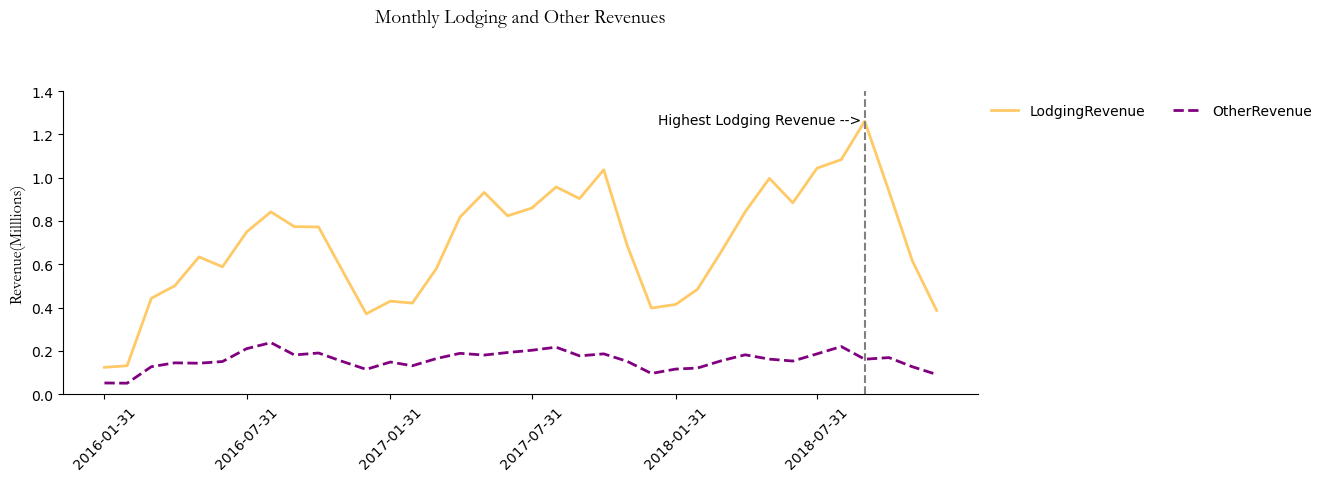

In [7]:
fig, ax = plt.subplots(figsize=(lambda x,y: (x/2.54,y/2.54))(30,10)) #The lambda function converts inches to cm

ax.plot(monthly_revenue.index, 
        monthly_revenue['LodgingRevenue'] / 1000000, #removes the exponential symbol at the top of the chart
        color='orange',
        ls='-', #Line styles
        linewidth=2,
        label='LodgingRevenue', 
        alpha=0.6 #impact transparency
       );

ax.plot(monthly_revenue.index, 
        monthly_revenue['OtherRevenue'] / 1000000, 
        color='purple',
        ls='--',
        linewidth=2,
        label='OtherRevenue'
       );

ax.axvline(17804, color='grey', ls='--') #adding vertical line

ax.text(17540, 1.25, 'Highest Lodging Revenue -->') #adding text to desscribe the vertical line

ax.set_title('Monthly Lodging and Other Revenues', 
             fontsize=14, 
             fontfamily='Garamond',
             y=1.2 # pushing the chart title up
            )

ax.set_ylabel('Revenue(Milllions)', 
              fontsize=12, 
              fontfamily='Garamond'
             );

ax.spines[['top','right']].set_visible(False)
ax.legend(bbox_to_anchor=(1,1),
          ncol=2, #spread the legend labels horizontally
          frameon=False #remove the border around legend labels
         );

ax.set_ylim(0, 1.4); #sets the y axis limit

ax.set_xticks(monthly_revenue.index[::6]) #sets x axis labels/ticks to every six months

plt.xticks(rotation=45); #Rotates x-Ticks to 45 degrees

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [8]:
quarterly_bookings = hotels.groupby('date').agg({'BookingsCanceled':'sum', 'RoomNights':'sum'}).resample('Q').sum()

In [9]:
quarterly_bookings.head()

,BookingsCanceled,RoomNights
date,,
2016-03-31,15,8464
2016-06-30,26,15535
2016-09-30,27,19517
2016-12-31,17,15404
2017-03-31,12,15206


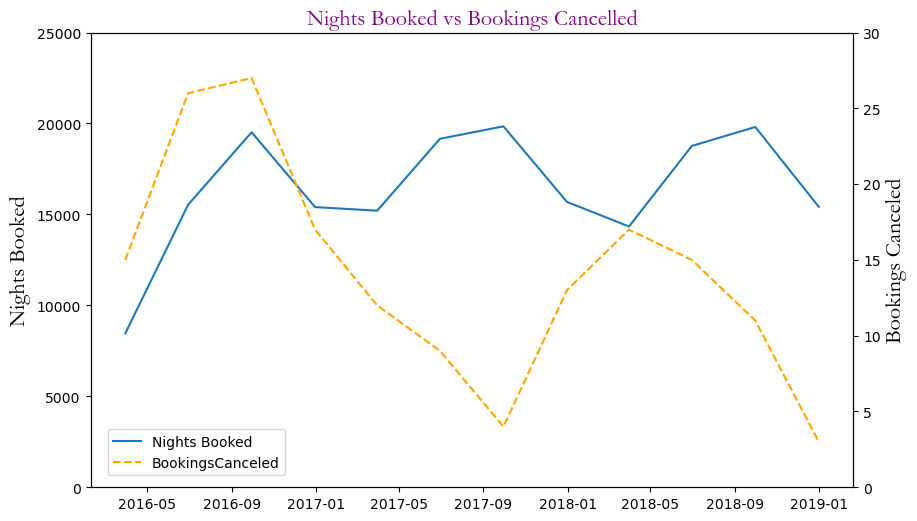

In [10]:
fig,ax=plt.subplots(figsize=(lambda x,y: (x/2.54,y/2.54))(25,15))

ax.plot(quarterly_bookings.index,
         quarterly_bookings['RoomNights'],
         label='Nights Booked'
        );
ax.set_ylim(0, 25000);
ax.set_ylabel('Nights Booked',
               fontfamily='Garamond',
               fontsize=16
              )

ax.set_title('Nights Booked vs Bookings Cancelled',
             fontfamily='Garamond',
             fontsize=16,
             c='Purple'
            )

ax2=ax.twinx()

ax2.plot(quarterly_bookings.index,
        quarterly_bookings['BookingsCanceled'],
         c='orange',
         ls='--',
        label='BookingsCanceled'
       );

ax2.set_ylim(0, 30)
ax2.set_ylabel('Bookings Canceled',
              fontfamily='Garamond',
              fontsize=16
             )


fig.legend(bbox_to_anchor=(0.33,0.22));

# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [11]:
countries=(hotels.groupby('Nationality')
           .agg({'RoomNights':'sum'})
           .sort_values(by='RoomNights', ascending=False)
           .iloc[:10])
countries

,RoomNights
Nationality,
FRA,31018
DEU,26334
PRT,24334
GBR,20822
ESP,10877
ITA,8046
BEL,7758
NLD,6619
BRA,6535


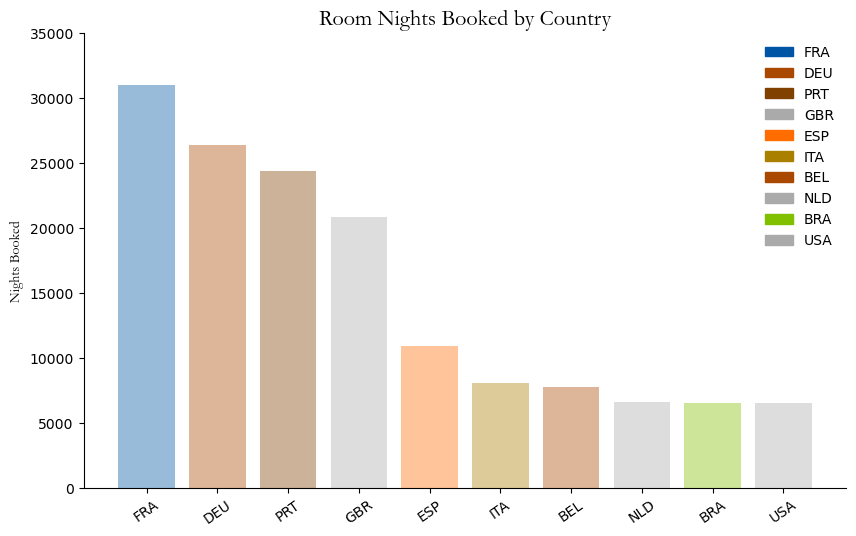

In [12]:
fig,ax=plt.subplots(figsize=(lambda x,y: (x/2.54,y/2.54))(25,15))

colors = [
    '#0055A4',  # France
    '#AA4800',  # Germany
    '#804000',  # Portugal
    '#AAAAAA',  # United Kingdom
    '#FF6C00',  # Spain
    '#AA8000',  # Italy
    '#AA4800',  # Belgium
    '#AAAAAA',  # Netherlands
    '#80C000',  # Brazil
    '#AAAAAA'   # United States
]

ax.bar(x=countries.index,
       height=countries['RoomNights'],
       color=colors,
       alpha=.4
      )

ax.spines[['top','right']].set_visible(False) 

ax.set_title('Room Nights Booked by Country',
             c='black',
             fontfamily='Garamond',
             fontsize=16
            )

ax.set_ylim(0,35000)

ax.set_ylabel('Nights Booked',
              fontfamily='Garamond',
              c='black'
             )

ax.xaxis.set_tick_params(rotation=35)

labels=[mpatches.Patch(color=item) for item in colors] #Creating patches for chart legend

plt.legend(labels,
           countries.index,
           frameon=False
          );

In [13]:
countries_one=(hotels.groupby('Nationality')
           .agg({'LodgingRevenue':'sum'})
           .sort_values(by='LodgingRevenue', ascending=False)
           .iloc[:10])
countries_one

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
BEL,1047661.98
ITA,1032729.72
NLD,904460.78
USA,903336.11


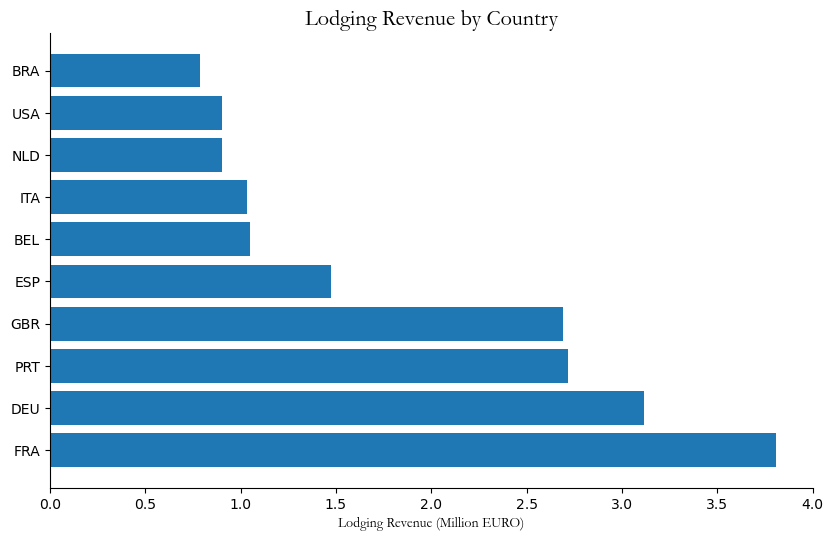

In [14]:
fig,ax=plt.subplots(figsize=(lambda x,y: (x/2.54,y/2.54))(25,15))

ax.barh(countries_one.index,
        countries_one['LodgingRevenue'] / 1000000
      )

ax.set_xlim(0, 4.0)

ax.spines[['top','right']].set_visible(False)

ax.set_title('Lodging Revenue by Country',
             c='black',
             fontfamily='Garamond',
             fontsize=16
            )

ax.set_xlabel('Lodging Revenue (Million EURO)',
              fontfamily='Garamond',
              c='black'
             );
#ax.xaxis.set_tick_params(rotation=35)

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

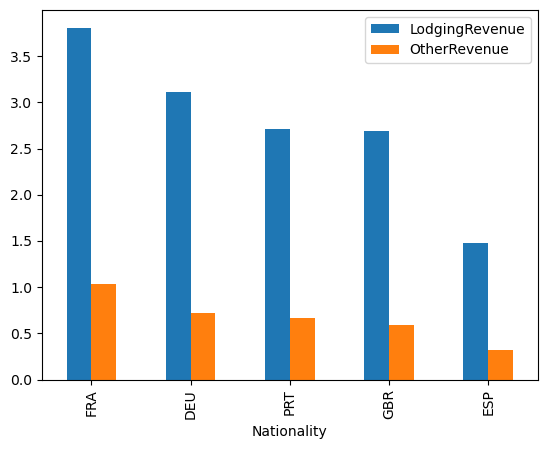

In [15]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

top_5_countries = (hotels
                   .query('Nationality in @countries')
                   .groupby(['Nationality'])
                   .agg({'LodgingRevenue':'sum', 'OtherRevenue':'sum'})
                   .sort_values(by='LodgingRevenue',ascending=False)
                  ).apply(lambda x: x/1000000)

top_5_countries.plot.bar();

In [16]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]
top_5_countries2 = top_5_countries.apply(lambda x: x * 100 / sum(x), axis=1)

top_5_countries2

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


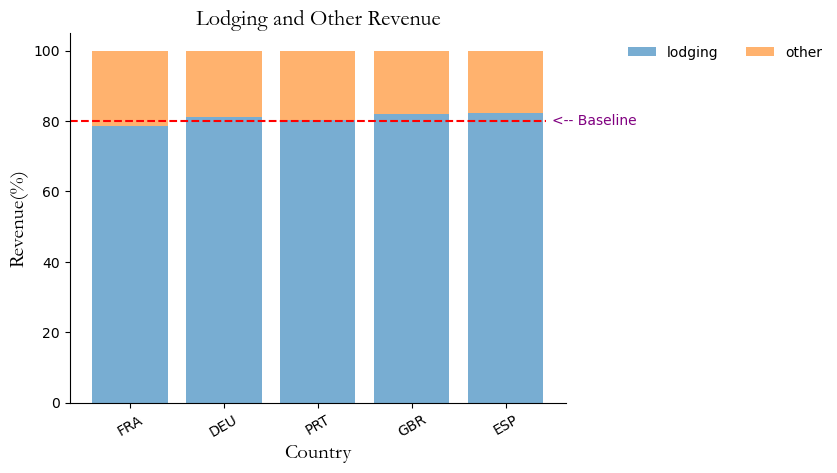

In [17]:
fig,ax=plt.subplots()#(figsize=(lambda x,y: (x/2.54,y/2.54))(25,15))

ax.spines[['top','right']].set_visible(False)
ax.set_title(
    'Lodging and Other Revenue',
    fontsize=16,
    fontfamily='Garamond'
)

ax.bar(
    x=top_5_countries2.index,
    height=top_5_countries2['LodgingRevenue'],
    label='lodging',
    alpha=0.6
)
ax.bar(
    x=top_5_countries2.index,
    height=top_5_countries2['OtherRevenue'],
    label='other',
    bottom=top_5_countries2['LodgingRevenue'],
    alpha=0.6
)

ax.axhline(y=80, xmin=0, xmax=0.96, c='red', ls='--')
ax.xaxis.set_tick_params(rotation=30)
ax.set_ylabel(
    'Revenue(%)',
    fontsize=15,
    fontfamily='Garamond'
)

ax.set_xlabel(
    'Country',
    fontsize=15,
    fontfamily='Garamond'
)

ax.legend(bbox_to_anchor=(1.1,1),
          frameon=False,
          ncol=2
         )

ax.text(4.49,79,'<-- Baseline',c='purple');

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [18]:
country_rev = hotels.groupby(['Nationality']).agg({'LodgingRevenue':'sum'}).sort_values(by='LodgingRevenue',ascending=False)
top_five = country_rev.iloc[:5]
top_five

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33


In [19]:
rest_df = pd.DataFrame(country_rev.iloc[5:].sum()).T
rest_df.index = ['Other']
rest_df

,LodgingRevenue
Other,11170126.66


In [20]:
country_rev2= pd.concat([top_five,rest_df])
country_rev2

,LodgingRevenue
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
Other,11170126.66


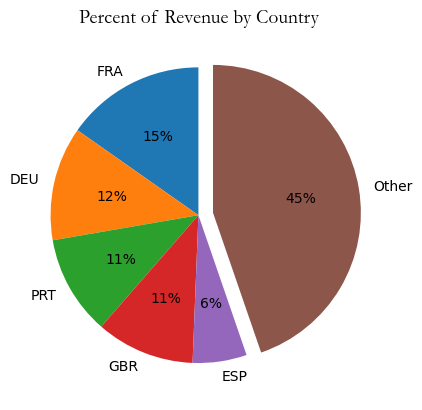

In [21]:
fig,ax=plt.subplots()

ax.pie(country_rev2['LodgingRevenue'],
       startangle=90,
       labels=country_rev2.index,
       autopct='%.0f%%',
       explode=(0,0,0,0,0,0.1),
      );

ax.set_title('Percent of Revenue by Country',
             fontfamily='Garamond',
             fontsize=14
            );

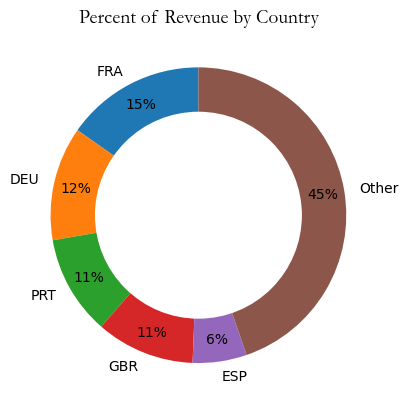

In [22]:
fig,ax=plt.subplots()

ax.pie(country_rev2['LodgingRevenue'],
       startangle=90,
       labels=country_rev2.index,
       autopct='%.0f%%',
       pctdistance=.85
      );

donut_hole = plt.Circle((0,0), 0.70, fc='white') # Circle((centered), radius,fill-color) - creates the donut hole
fig=plt.gcf() # gets the current figure
fig.gca().add_artist(donut_hole) # gca gets current axis and add_artist adds the donut hole to fig

ax.set_title('Percent of Revenue by Country',
             fontfamily='Garamond',
             fontsize=14
            );

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [24]:
new_hotel = hotels.assign(total_revenue = hotels['LodgingRevenue'] + hotels['OtherRevenue'],
                         revenue_per_night = lambda x: x['total_revenue'] / x['RoomNights']
                        )
new_hotel.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date,total_revenue,revenue_per_night
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,2018-08-03,476.3,95.26
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,2016-01-01,333.0,66.60
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,2016-01-01,0.0,NaN
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,2016-01-01,300.0,60.00
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,2016-01-01,0.0,NaN


In [28]:
agg_hotel = new_hotel.groupby('Nationality').agg({'PersonsNights':'mean', 
                                               'LodgingRevenue':'mean',
                                               'total_revenue':'mean',
                                                'revenue_per_night':'mean',
                                                'Age': 'mean'
                                              })
agg_hotel.head()

,PersonsNights,LodgingRevenue,total_revenue,revenue_per_night,Age
Nationality,,,,,
ABW,8.666667,632.173333,717.740000,204.421111,42.666667
AGO,6.186813,529.872088,632.826868,177.745487,41.681319
AIA,6.000000,388.200000,430.033333,232.737500,25.666667
ALB,5.692308,265.838462,328.298462,118.783788,35.153846
AND,4.000000,443.914286,537.178571,283.452381,43.285714


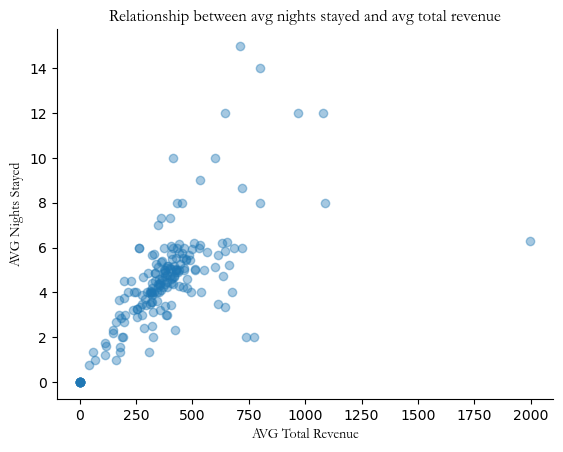

In [36]:
fig,ax = plt.subplots()

ax.scatter(x=agg_hotel['total_revenue'],
           y=agg_hotel['PersonsNights'],
           alpha=0.4
          )

# ax.set_ylim(0,16)
# ax.set_xlim(0,2100)
ax.set_title('Relationship between avg nights stayed and avg total revenue',
             fontfamily='Garamond'
            );
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('AVG Total Revenue',
              fontfamily='Garamond'
             )
ax.set_ylabel('AVG Nights Stayed',
              fontfamily='Garamond'
             );

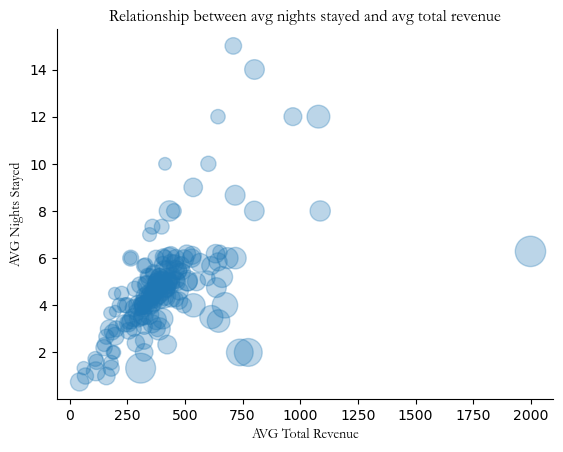

In [37]:
fig,ax = plt.subplots()

ax.scatter(x=agg_hotel['total_revenue'],
           y=agg_hotel['PersonsNights'],
           s=agg_hotel['revenue_per_night'],
           alpha=0.3
          )

# ax.set_xlim(0,16)
# ax.set_ylim(0,2100)
ax.set_title('Relationship between avg nights stayed and avg total revenue',
             fontfamily='Garamond'
            );
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('AVG Total Revenue',
              fontfamily='Garamond'
             )
ax.set_ylabel('AVG Nights Stayed',
              fontfamily='Garamond'
             );

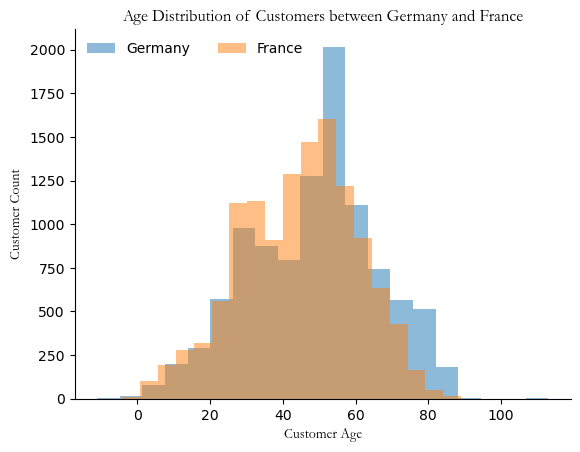

In [64]:
germany_age = new_hotel.loc[new_hotel['Nationality'] == 'DEU', 'Age']
france_age = new_hotel.loc[new_hotel['Nationality'] == 'FRA', 'Age']

fig,ax = plt.subplots()

ax.hist(germany_age,
        #density=True,
        alpha=0.5,
        bins=20,
        #edgecolor='white', #creates a white line between the bars for clear visuals
        #linewidth=2 #expands the width of thw white line created above
       )
ax.hist(france_age,
        #density=True,
        alpha=0.5,
        bins=20,
        #edgecolor='white',
        #linewidth=2
       )


ax.set_title('Age Distribution of Customers between Germany and France',
             fontfamily='Garamond'
            );
ax.spines[['top','right']].set_visible(False)
ax.set_ylabel('Customer Count',
              fontfamily='Garamond'
             )
ax.set_xlabel('Customer Age',
              fontfamily='Garamond'
             );
ax.legend(['Germany', 'France'],
          frameon=False,
          ncols=2
         );